In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from transit_periodogram.transit_periodogram import transit_periodogram

<Container object of 3 artists>

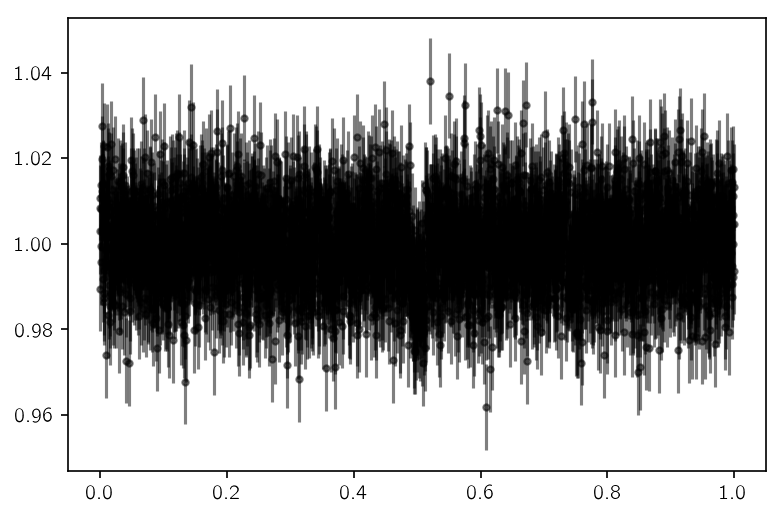

In [3]:
np.random.seed(49)

time = np.linspace(0, 60, 3000)

flux_err = 0.01 + np.zeros_like(time)
period = 5

transit_depth = 0.01
transit_time = 2.5
transit_duration = 0.125

flux = np.ones_like(time)
flux[np.abs((time - transit_time + 0.5*period) % period - 0.5*period) < 0.5*transit_duration] = 1.0 - transit_depth

flux += flux_err * np.random.randn(len(flux))

plt.errorbar((time%period)/period, flux, yerr=flux_err, fmt=".k", alpha=0.5)
# plt.xlim(0, );

In [4]:
df = 0.5 / (time.max() - time.min())
fmax = 0.1 / np.median(np.diff(time))
freq = np.arange(10*df, fmax, 0.02*df)
periods = 1.0 / freq
len(freq)

29491

In [5]:
periods, periodogram, log_likelihood, depth_snr, depth, depth_ivar, phase, best_durations = \
    transit_periodogram(time, flux, periods, transit_duration,
                        flux_err=flux_err, progress=True)

100%|██████████| 29491/29491 [00:01<00:00, 26199.85it/s]


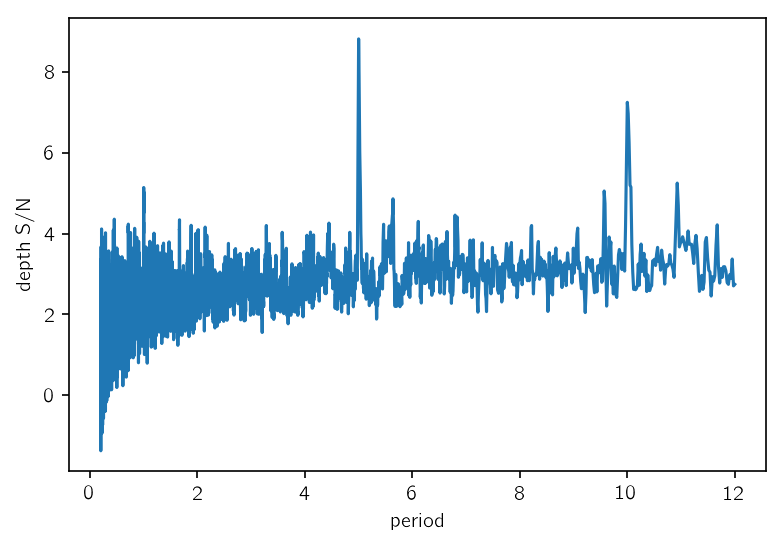

In [6]:
plt.plot(periods, periodogram)
plt.xlabel("period")
plt.ylabel("depth S/N");

In [7]:
periods, periodogram, log_likelihood, depth_snr, depth, depth_ivar, phase, best_durations = \
    transit_periodogram(time, flux, periods, transit_duration,
                        flux_err=flux_err, progress=True, method="likelihood")

100%|██████████| 29491/29491 [00:02<00:00, 10090.54it/s]


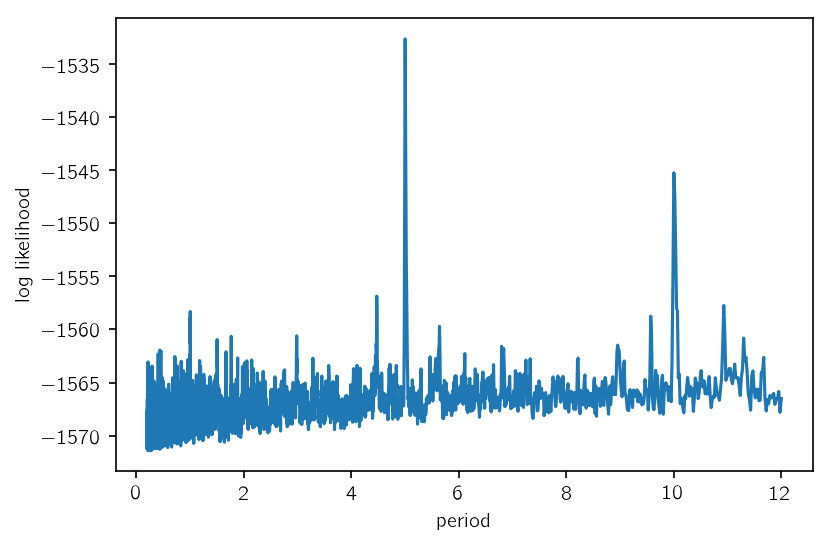

In [8]:
plt.plot(periods, log_likelihood)
plt.xlabel("period")
plt.ylabel("log likelihood");

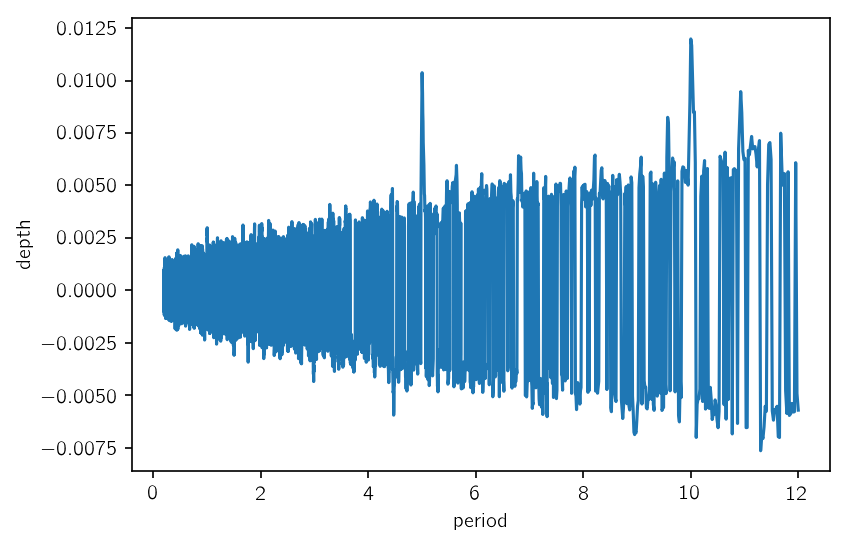

In [9]:
plt.plot(periods, depth)
plt.xlabel("period")
plt.ylabel("depth");

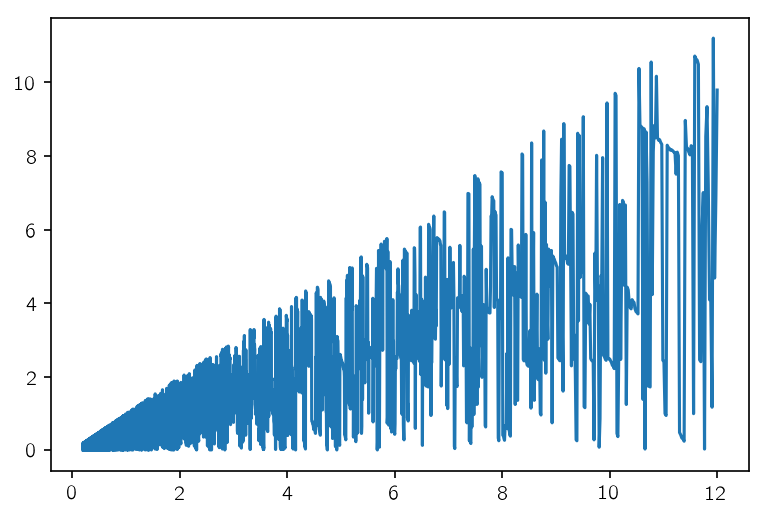

In [10]:
plt.plot(periods, phase)

In [11]:
ind = np.argmax(periodogram)
periods[ind], phase[ind], depth[ind]

(5.000000000000079, 2.4937500000000004, 0.010376432432543048)

In [12]:
period, transit_time

(5, 2.5)

In [13]:
len(freq), len(periods)

(29491, 29491)

In [9]:
import bls

In [10]:
%%timeit
u = np.empty_like(time)
v = np.empty_like(time)
nf = len(freq)
fmin = np.min(freq)
df = freq[1] - freq[0]
nb = 400
qmi = transit_duration/period
qma = transit_duration/period
results = bls.eebls(time, flux, u, v, nf, fmin, df, nb, qmi, qma)

1 loop, best of 3: 325 ms per loop


In [6]:
%%timeit
transit_periodogram(time, flux, periods, transit_duration, flux_err=flux_err)

1 loop, best of 3: 993 ms per loop


In [7]:
%%prun
transit_periodogram(time, flux, periods, transit_duration, flux_err=flux_err)

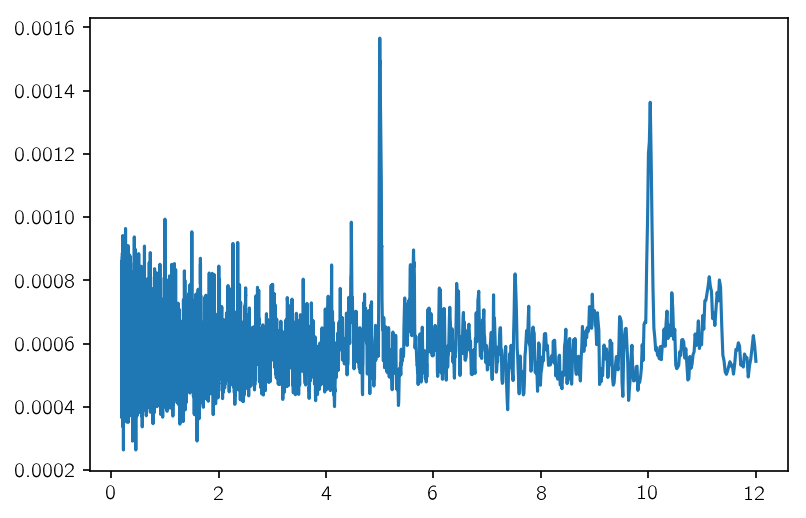

In [36]:
plt.plot(periods, results[0])